In [20]:
import torch
from transformers import PatchTSTForPrediction
import numpy as np
import matplotlib.pyplot as plt

# Read BPM values from three text files
bpm_values_cr1 = np.loadtxt("cr_total.txt")
bpm_values_g = np.loadtxt("g_total.txt")

# Pad or truncate the sequences to match the model's input length (512)
max_sequence_length = 512
bpm_values_cr1 = torch.tensor(bpm_values_cr1[:max_sequence_length], dtype=torch.float32)
bpm_values_g = torch.tensor(bpm_values_g[:max_sequence_length], dtype=torch.float32)

# Concatenate the values of all three files into a single tensor
input_values = torch.stack([bpm_values_cr1, bpm_values_g], dim=1)  # Shape: [sequence_length, num_channels]

model = PatchTSTForPrediction.from_pretrained("chungimungi/PatchTST-2-input-channels")

# Ensure the model is in evaluation mode
model.eval()

# During inference, one only provides past values, the model outputs future values
with torch.no_grad():
    outputs = model(past_values=input_values.unsqueeze(0))  # Add batch dimension
    prediction_outputs = outputs.prediction_outputs

# Extract predicted future values
predicted_values = prediction_outputs.squeeze(0)  # Remove batch dimension

bpm_values_cr1 = bpm_values_cr1.numpy()
bpm_values_g = bpm_values_g.numpy()
predicted_bpm_cr1 = predicted_values[:, 0].numpy()
predicted_bpm_g = predicted_values[:, 1].numpy()

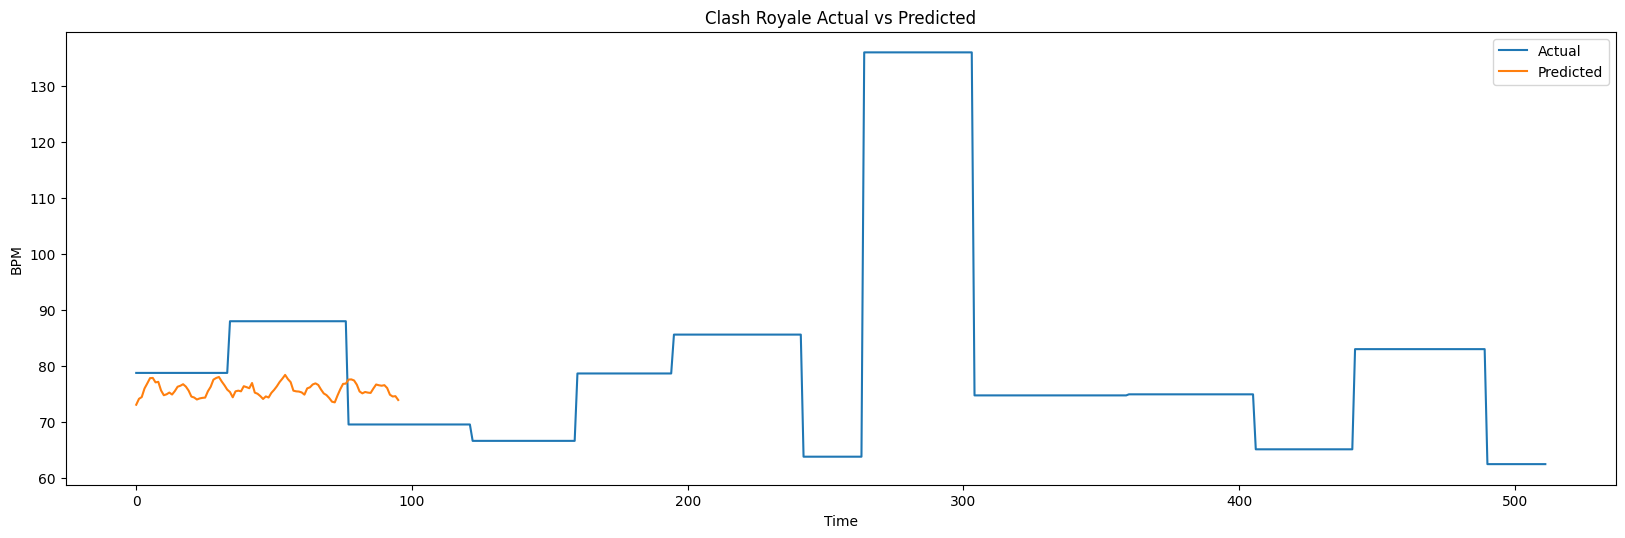

In [21]:

# Create a figure and axis for BPM
plt.figure(figsize=(20, 20))

# Plot BPM for cr1
plt.subplot(311)
plt.plot(bpm_values_cr1, label='Actual')
plt.plot(predicted_bpm_cr1, label='Predicted')
plt.xlabel('Time')
plt.ylabel('BPM')
plt.title('Clash Royale Actual vs Predicted')
plt.legend()


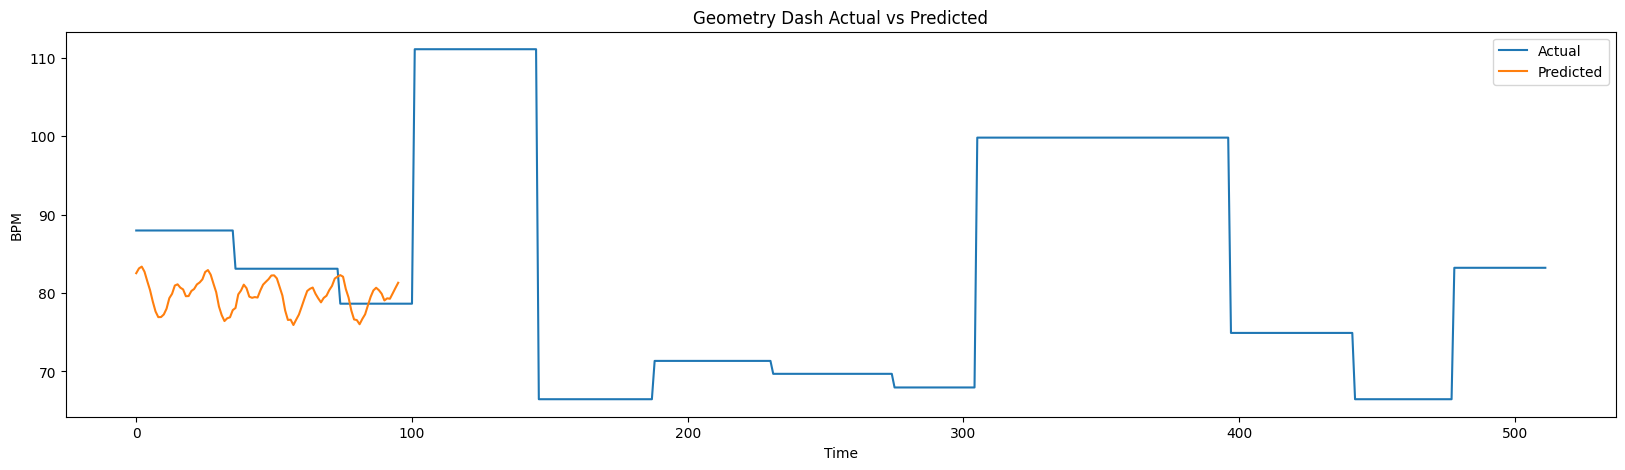

In [22]:
plt.figure(figsize=(20, 20))

# Plot BPM for g
plt.subplot(312)
plt.plot(bpm_values_g, label='Actual')
plt.plot(predicted_bpm_g, label='Predicted')
plt.xlabel('Time')
plt.ylabel('BPM')
plt.title('Geometry Dash Actual vs Predicted')
plt.legend()

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()


In [23]:
import numpy as np

# Define the window size for moving average
window_size = 60

# Calculate the moving average for predicted BPM values
moving_avg_predicted_cr1 = np.convolve(predicted_bpm_cr1, np.ones(window_size)/window_size, mode='valid')
moving_avg_predicted_g = np.convolve(predicted_bpm_g, np.ones(window_size)/window_size, mode='valid')

moving_avg_predicted_cr1 = np.mean(moving_avg_predicted_cr1)
moving_avg_predicted_g = np.mean(moving_avg_predicted_g)

# Print the moving averages and overall averages
print("Moving average BPM for Clash Royale (Predicted):", moving_avg_predicted_cr1)
print("Moving average BPM for Geometry Dash (Predicted):", moving_avg_predicted_g)


Moving average BPM for Clash Royale (Predicted): 75.81311619389164
Moving average BPM for Geometry Dash (Predicted): 79.61512263186344
